<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Dataset-with-sentiments.csv')

In [3]:
data.head(5)

,Video ID,Comment ID,comments,Likes,polarity,pol_cat,stop_comments
0,MwpMEbgC7DA,UgzSCaG-BeNW0LkW2px4AaABAg,that s beautiful,0,0.850000,1,beautiful
1,MwpMEbgC7DA,Ugw6J6RLt2VGaKMAz4h4AaABAg,imagine being able to listen to this so...,176,0.375000,1,imagine able listen song like first time ever ...
2,MwpMEbgC7DA,UgwyFvqt1jZGR1l32sl4AaABAg,i've memorized this song more than math ...,4,0.333333,1,'ve memorized song math equations think song m...
3,MwpMEbgC7DA,UgzzG2fg2Aq8HjJAQUB4AaABAg,every time i listen to this reminds me ...,0,0.850000,1,every time listen reminds tvd elena damon rain...
4,MwpMEbgC7DA,Ugwx9ephHmJlIN8Sc614AaABAg,forever my cry song,2,0.000000,0,forever cry song


In [4]:
sum(data['stop_comments'].isnull())

2

In [5]:
data = data[data['stop_comments'].notnull()]

In [6]:
sum(data['stop_comments'].isnull())

0

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [9]:
X_train.shape

(1801,)

In [10]:
X_test.shape

(451,)

In [11]:
data['pol_cat'].value_counts()

1    1217
0    1035
Name: pol_cat, dtype: int64

## **Gonna apply Naive Bayes**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
#vect = CountVectorizer()
#tf_train = vect.fit_transform(X_train)
#tf_test = vect.transform(X_test)

vect = TfidfVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [13]:
tf_train

<1801x3368 sparse matrix of type '<class 'numpy.float64'>'
	with 15902 stored elements in Compressed Sparse Row format>

In [14]:
tf_train.shape

(1801, 3368)

In [15]:
#print(vect.vocabulary_)

In [17]:
#vocab = vect.vocabulary_

Aplicando lo de TfidfTransformer mejora considerablemente. Buscar por qué

In [20]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(tf_train, y_train)

**Accuracy score on training dataset**

In [21]:
clf.score(tf_train, y_train)

0.9156024430871738

**Accuracy score on test dataset i.e got from the splitting**

In [22]:
clf.score(tf_test, y_test)

0.753880266075388

**Make predictions on the test dataset i.e. unseen data to the model**

In [23]:
expected = y_test
predicted = clf.predict(tf_test)

**plot confusion matrix for the test dataset**

In [24]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [25]:
pip install mlxtend

[[232   0]
 [  0   0]]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


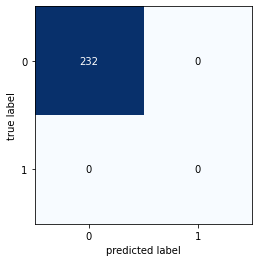

In [26]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [27]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.96      0.50      0.66       215
           1       0.68      0.98      0.81       236

    accuracy                           0.75       451
   macro avg       0.82      0.74      0.73       451
weighted avg       0.82      0.75      0.74       451



**find the F1 score**

In [28]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.7337534902273635

# **Test the model with the comments of the other video**

In [29]:
data_test = pd.read_csv('Video_2/Dataset-with-sentiments.csv')

In [30]:
sum(data_test['stop_comments'].isnull())

0

In [31]:
data_test = data_test[data_test['stop_comments'].notnull()]

In [32]:
sum(data_test['stop_comments'].isnull())

0

In [33]:
data_test['pol_cat'].value_counts()

1    738
0    738
Name: pol_cat, dtype: int64

In [34]:
tf_test = vect.transform(data_test['stop_comments'])

In [35]:
tf_test

<1476x3368 sparse matrix of type '<class 'numpy.float64'>'
	with 8985 stored elements in Compressed Sparse Row format>

In [36]:
tf_test.toarray()[0].sum()

2.218952813335892

In [37]:
tf_train.toarray().shape

(1801, 3368)

In [38]:
tf_test.toarray().shape

(1476, 3368)

In [41]:
clf.score(tf_test, data_test['pol_cat'])

0.6897018970189702